In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date
from sklearn.metrics import r2_score as R2S

In [2]:
today = date.today()
print("Today's date:", today)
date_today = str(today)
date_today

Today's date: 2024-05-22


'2024-05-22'

In [3]:
matplotlib.rcParams['font.family'] = 'Helvetica Neue LT Std'
sns.set_style({'font.family':'Helvetica Neue LT Std', 'font.serif':'Helvetica Neue LT Std'})

In [4]:
tubulin = '[Tubulin] ' r'$(\mu M)$'
tub = 'tub'

DCXconc = '[DCX] ' r'$(n M)$'
DCX = 'DCX'
Type = 'DCX Type'

taxol = '[Paclitaxel] (' r'$\mu$' 'M)'#'[Taxol] ' r'$(\mu M)$' #'[Docetaxol] ' r'$(\mu M)$' #'[Epothilone D] ' r'$(\mu M)$'
epod = '[Epothilone D] (' r'$\mu$' 'M)'
doce = '[Docetaxel] (' r'$\mu$' 'M)'
sirtub = '[SiR-tubulin] (' r'$\mu$' 'M)'
tax = 'epoD'

Concentration = 'Concentration (' r'$\mu$' 'M)'
Length = 'Length ' r'$(\mu m)$'
Lifetime = 'Lifetime ' r'$(min)$'
GrowthRate = 'Growth Rate ' r'$(\mu m / min)$'
TimeToNucleate = 'Time to Nucleate ' r'$(min)$'
ShrinkageLength = 'Shrink Length ' r'$(\mu m)$'
ShrinkageLifetime = 'Shrink Lifetime ' r'$(min)$'
ShrinkageRate = 'Shrink Rate ' r'$(\mu m / min)$'

drug = '[Drug] ' r'$(\mu M)$'
drugtype = 'Drug Type'

nogales2018 = (1- 81.76/83.95)*100
nogales2018

2.608695652173909

In [5]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
darkyellow= '#FCF2B8'
yellow = '#FFCB05'
lightyellow = '#FCF2B8'
pink = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))


palette = [grey,cyan] + list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green]
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]

StartHue3 = Color(lightyellow)
Yellowcolor = list(StartHue3.range_to(Color(darkyellow),5))
Yellowpalette = list(map(Color.get_hex,Yellowcolor))
Yellowpalette

['#fcf2b8', '#fcf2b8', '#fcf2b8', '#fcf2b8', '#fcf2b8']

## Import Kappa csv ##

In [6]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [106]:
folders = [x for x in path.iterdir() if x.is_dir()]
folders = [i for i in folders if str(i.stem).rfind(tax) != -1]
folders

[WindowsPath('D:/Sofia/2023_1winter/2023-02-02_doublecap_EpoD/CH1_epoD0.1uM'),
 WindowsPath('D:/Sofia/2023_1winter/2023-02-02_doublecap_EpoD/CH2_epoD0.1uM')]

In [107]:
files = []
for k in folders:
    files0 = [x for x in k.iterdir() if x.is_file()]
    files0 = [i for i in files0 if str(i).rfind('final') != -1 if str(i).rfind('csv') != -1]
    files = files + files0
files

[WindowsPath('D:/Sofia/2023_1winter/2023-02-02_doublecap_EpoD/CH1_epoD0.1uM/1-Stack_Composite-final-1-plain.csv'),
 WindowsPath('D:/Sofia/2023_1winter/2023-02-02_doublecap_EpoD/CH1_epoD0.1uM/1-Stack_Composite-final-2-epoD.csv'),
 WindowsPath('D:/Sofia/2023_1winter/2023-02-02_doublecap_EpoD/CH2_epoD0.1uM/1-Stack_Composite-final-1-plain.csv'),
 WindowsPath('D:/Sofia/2023_1winter/2023-02-02_doublecap_EpoD/CH2_epoD0.1uM/1-Stack_Composite-final-2-epoD.csv')]

In [108]:
files1 = [i for i in files if str(i).rfind('1-plain') != -1 ]
files2 = [i for i in files if str(i).rfind('2-'+tax) != -1 ]
#files3 = [i for i in files if str(i).rfind('3dcx') != -1 ]
files2

[WindowsPath('D:/Sofia/2023_1winter/2023-02-02_doublecap_EpoD/CH1_epoD0.1uM/1-Stack_Composite-final-2-epoD.csv'),
 WindowsPath('D:/Sofia/2023_1winter/2023-02-02_doublecap_EpoD/CH2_epoD0.1uM/1-Stack_Composite-final-2-epoD.csv')]

In [109]:
def findmetadata(tag,end,i):
    n = len(tag)
    locstart = str(i).rfind(tag) 
    locend = str(i).find(end, locstart)
    tag0 = str(i)[locstart+n: locend]
    
    return tag0

In [110]:
dates= []
CH= []
taxl= []
dcx = []
dcxtype= []
for i in files1:
    dateloc = str(i).rfind("202")   
    dates0 = str(i)[dateloc : dateloc+10]
    dates = dates + [dates0]

    CH0 = findmetadata("CH",'_',i)
    CH = CH + [CH0]  
    
    #dcx0 = findmetadata("DCX",'nM',i)
    #dcx = dcx + [dcx0] 
    
    #type0 = findmetadata("type",'_',i)
    #dcxtype = dcxtype + [type0] 
    
    taxl0 = findmetadata(tax,'uM',i)
    taxl = taxl + [taxl0] 
    

dates,CH,dcx, dcxtype,taxl

(['2023-02-02', '2023-02-02'], ['1', '2'], [], [], ['0.1', '0.1'])

In [111]:
def keep_avg_kappa(file,i,timepoint):
    data = pd.read_csv(file, encoding='utf-8')
    
    keep_columns = ['Curve Name','Curve Length (um)']
    
    data_avg = data.drop_duplicates(subset ='Curve Length (um)', keep = 'first')
    data_avg = data_avg[keep_columns]
    
    if timepoint == 'plain':
        data_avg[taxol]=0
        data_avg[DCXconc]=0
        data_avg[Type]='None'
        
    if timepoint == 'tax':
        data_avg[taxol]=float(taxl[i])
        data_avg[DCXconc]=0
        data_avg[Type]='None'
        
#     if timepoint == 'dcx':
#         data_avg[taxol]=float(tax[i])
#         data_avg[DCXconc]=float(dcx[i])
#         data_avg[Type]=dcxtype[i]
                
        
    data_avg['Date']=dates[i]
    data_avg['CH']=CH[i]
    
    return data_avg

In [112]:
data = pd.DataFrame(columns=[] , index=[])
for i in range(0,len(files1)):
    
    data_1plain_avg = keep_avg_kappa(files1[i],i,'plain')
    data_2tax_avg = keep_avg_kappa(files2[i],i,'tax')
    #data_3dcx_avg = keep_avg_kappa(files3[i],i,'dcx')

    data0 = pd.concat([data_1plain_avg, data_2tax_avg], ignore_index=True)

    data0 = data0.sort_values(['Curve Name',taxol,DCXconc])

    data = pd.concat([data,data0], ignore_index=True)

In [113]:
data

,Curve Name,Curve Length (um),[Epothilone D] $(\mu M)$,[DCX] $(n M)$,DCX Type,Date,CH
0,CURVE 1,7.927621,0.0,0,None,2023-02-02,1
1,CURVE 1,8.110583,0.1,0,None,2023-02-02,1
2,CURVE 2,9.059712,0.0,0,None,2023-02-02,1
3,CURVE 2,9.263397,0.1,0,None,2023-02-02,1
4,CURVE 3,9.247815,0.0,0,None,2023-02-02,1
5,CURVE 3,9.321196,0.1,0,None,2023-02-02,1
6,CURVE 1,8.020421,0.0,0,None,2023-02-02,2
7,CURVE 1,8.268629,0.1,0,None,2023-02-02,2
8,CURVE 10,5.922948,0.0,0,None,2023-02-02,2
9,CURVE 10,6.067056,0.1,0,None,2023-02-02,2


In [114]:
path.parents[1]

WindowsPath('D:/Sofia')

In [115]:
newdirectory = str(path.parents[0])+'//Expansion_Data_Sheets'
newmydir = Path(newdirectory)
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('D:/Sofia/2023_1winter/Expansion_Data_Sheets')

In [116]:
name = dates[0]+'_EpoD_expansion_analysed-on_'+date_today +'.csv'
name

'2023-02-02_EpoD_expansion_analysed-on_2023-02-03.csv'

In [117]:
data.to_csv(path/(name), encoding='utf-8', index=False)
data.to_csv(newmydir/(name), encoding='utf-8', index=False)

### JOIN ###

In [118]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [119]:
files = [x for x in path.iterdir() if x.is_file()]
files = [i for i in files if str(i).rfind('EpoD') != -1]
files = [i for i in files if str(i).rfind('Sheet.csv') == -1 if str(i).rfind('csv') != -1]
files

[WindowsPath('D:/Sofia/2023_1winter/Expansion_Data_Sheets/2023-01-19_EpoD_expansion_analysed-on_2023-02-01.csv'),
 WindowsPath('D:/Sofia/2023_1winter/Expansion_Data_Sheets/2023-01-24_EpoD_expansion_analysed-on_2023-02-01.csv'),
 WindowsPath('D:/Sofia/2023_1winter/Expansion_Data_Sheets/2023-01-25_EpoD_expansion_analysed-on_2023-02-01.csv'),
 WindowsPath('D:/Sofia/2023_1winter/Expansion_Data_Sheets/2023-02-02_EpoD_expansion_analysed-on_2023-02-03.csv')]

In [120]:
joindata = pd.read_csv(files[0], encoding='utf-8')
for i in range(1,len(files)):
    d = pd.read_csv(files[i], encoding='utf-8')
    joindata = joindata.append(d, ignore_index=True)

joindata.to_csv(path/('jointdata-on_'+date_today +'_Doce_MasterSheet.csv'), encoding='utf-8', index=False)
joindata

,Curve Name,Curve Length (um),[Epothilone D] $(\mu M)$,[DCX] $(n M)$,DCX Type,Date,CH
0,CURVE 1,11.829896,0.0,0,None,2023-01-19,1
1,CURVE 1,12.143414,10.0,0,None,2023-01-19,1
2,CURVE 2,7.579007,0.0,0,None,2023-01-19,1
3,CURVE 2,7.774119,10.0,0,None,2023-01-19,1
4,CURVE 3,6.910134,0.0,0,None,2023-01-19,1
...,...,...,...,...,...,...,...
135,CURVE 7,7.613788,0.1,0,None,2023-02-02,2
136,CURVE 8,6.447007,0.0,0,None,2023-02-02,2
137,CURVE 8,6.560230,0.1,0,None,2023-02-02,2
138,CURVE 9,7.460709,0.0,0,None,2023-02-02,2


In [121]:
# plainData = joindata.iloc[:-2:3]
# taxData = joindata.iloc[1:-1:3]
# dcxData = joindata.iloc[2::3]
plainData = joindata.iloc[:-1:2]
taxData = joindata.iloc[1::2]

In [122]:
taxData

,Curve Name,Curve Length (um),[Epothilone D] $(\mu M)$,[DCX] $(n M)$,DCX Type,Date,CH
1,CURVE 1,12.143414,10.0,0,None,2023-01-19,1
3,CURVE 2,7.774119,10.0,0,None,2023-01-19,1
5,CURVE 3,7.012163,10.0,0,None,2023-01-19,1
7,CURVE 4,6.634512,10.0,0,None,2023-01-19,1
9,CURVE 5,7.645918,10.0,0,None,2023-01-19,1
...,...,...,...,...,...,...,...
131,CURVE 5,7.561172,0.1,0,None,2023-02-02,2
133,CURVE 6,5.221171,0.1,0,None,2023-02-02,2
135,CURVE 7,7.613788,0.1,0,None,2023-02-02,2
137,CURVE 8,6.560230,0.1,0,None,2023-02-02,2


In [18]:
def percent_expansion(beforeData, afterData):
    ratio = beforeData['Curve Length (um)'].values / afterData['Curve Length (um)'].values
    prcnt_expansion = (1- ratio)*100
    afterData['Expansion %'] = prcnt_expansion
    return afterData

In [124]:
percent_expansion(plainData, taxData)
#percent_expansion(plainData, dcxData)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Curve Name,Curve Length (um),[Epothilone D] $(\mu M)$,[DCX] $(n M)$,DCX Type,Date,CH,Expansion %
1,CURVE 1,12.143414,10.0,0,None,2023-01-19,1,2.581796
3,CURVE 2,7.774119,10.0,0,None,2023-01-19,1,2.509758
5,CURVE 3,7.012163,10.0,0,None,2023-01-19,1,1.455021
7,CURVE 4,6.634512,10.0,0,None,2023-01-19,1,2.573112
9,CURVE 5,7.645918,10.0,0,None,2023-01-19,1,2.423518
...,...,...,...,...,...,...,...,...
131,CURVE 5,7.561172,0.1,0,None,2023-02-02,2,2.294891
133,CURVE 6,5.221171,0.1,0,None,2023-02-02,2,0.176963
135,CURVE 7,7.613788,0.1,0,None,2023-02-02,2,1.567684
137,CURVE 8,6.560230,0.1,0,None,2023-02-02,2,1.725892


In [125]:
finalData = taxData
finalData

,Curve Name,Curve Length (um),[Epothilone D] $(\mu M)$,[DCX] $(n M)$,DCX Type,Date,CH,Expansion %
1,CURVE 1,12.143414,10.0,0,None,2023-01-19,1,2.581796
3,CURVE 2,7.774119,10.0,0,None,2023-01-19,1,2.509758
5,CURVE 3,7.012163,10.0,0,None,2023-01-19,1,1.455021
7,CURVE 4,6.634512,10.0,0,None,2023-01-19,1,2.573112
9,CURVE 5,7.645918,10.0,0,None,2023-01-19,1,2.423518
...,...,...,...,...,...,...,...,...
131,CURVE 5,7.561172,0.1,0,None,2023-02-02,2,2.294891
133,CURVE 6,5.221171,0.1,0,None,2023-02-02,2,0.176963
135,CURVE 7,7.613788,0.1,0,None,2023-02-02,2,1.567684
137,CURVE 8,6.560230,0.1,0,None,2023-02-02,2,1.725892


In [126]:
finalData = finalData[finalData['Curve Length (um)'] > 5]

In [127]:
finalData.to_csv(path/('expansion_plain_to_EpoD_data-analyzed_'+date_today +'_MasterSheet.csv'), encoding='utf-8', index=False)

## LOAD DATA ##

In [6]:
askfile = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the folder on ONE date you want to process
filepath = Path(askfile)
filename = filepath.stem
filepath, filename

(WindowsPath('C:/Users/sofia/OneDrive - McGill University/CurrBio2023/Sofia/Data/expansion-drug/merge-drug-data-on_2023-11-13_MasterSheet.csv'),
 'merge-drug-data-on_2023-11-13_MasterSheet')

In [7]:
finalData = pd.read_csv(filepath, encoding='utf-8')
finalData

,CH,Curve Length (um),Curve Name,DCX Type,Date,Drug Type,Expansion %,[DCX] $(n M)$,[Drug] $(\mu M)$
0,1,9.010838,CURVE 1,NaN,2022-05-25,Paclitaxel,-0.004813,0,0.0
1,1,4.716750,CURVE 2,NaN,2022-05-25,Paclitaxel,0.027885,0,0.0
2,1,8.703554,CURVE 3,NaN,2022-05-25,Paclitaxel,0.002003,0,0.0
3,1,7.839037,CURVE 5,NaN,2022-05-25,Paclitaxel,-0.085216,0,0.0
4,1,2.708195,CURVE 6,NaN,2022-05-25,Paclitaxel,0.045181,0,0.0
...,...,...,...,...,...,...,...,...,...
226,2,8.566150,CURVE 3,NaN,2022-11-10,SiR-tubulin,-0.008393,0,10.0
227,2,9.428532,CURVE 4,NaN,2022-11-10,SiR-tubulin,0.018932,0,10.0
228,2,7.548724,CURVE 5,NaN,2022-11-10,SiR-tubulin,-0.027145,0,10.0
229,2,10.715951,CURVE 6,NaN,2022-11-10,SiR-tubulin,0.499633,0,10.0


In [8]:
path = filepath.parents[0]

## PLOT DATA ##

In [9]:
nogales2018 = (1- 81.76/83.95)*100
nogales2018

2.608695652173909

In [10]:
nogales2015 = (1- 81.5/83.2)*100
nogales2015


2.043269230769229

In [11]:
TAXnogales2017preformed = (1- 81.5/81.8)*100
TAXnogales2017copoly = (1- 81.5/82.3)*100
TAXnogales2017preformed , TAXnogales2017copoly


(0.3667481662591676, 0.9720534629404587)

ValueError: Could not interpret value `Paclitaxel` for `x`. An entry with this name does not appear in `data`.

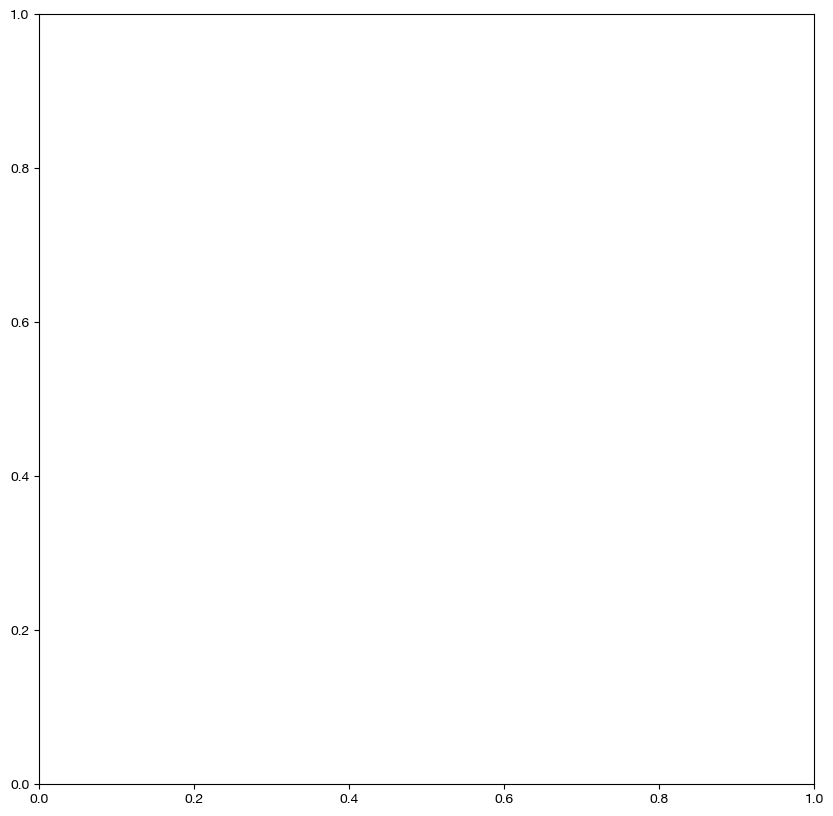

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

#rect = 0,0,1,1 # create an rectangle for the new axis
#log_ax = fig.add_axes(rect) # create a new axis (or use an existing one)
#log_ax.set_xscale("log") # log first

ax = sns.boxplot(x='Paclitaxel', y='Expansion %', data=finalData, whis=np.inf, palette='Blues',linewidth=3)
ax = sns.swarmplot(x='Paclitaxel', y='Expansion %', data=finalData, color=".2", size=12)

ax.axhline(y = nogales2018, color = lightorange ,linestyle="--", linewidth=5.5, label='GDP'r'$\rightarrow$''GMPCPP \n Zhang (2018)')
#plt.xlim(0.1,10)

ax.set_ylim(-0.5,4)
ax.legend( loc = 'lower right')
#ax.legend('')
ax.set_xlabel(taxol)

sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()


# plt.savefig(path/('expansion_'+date_today+'.svg'))

In [132]:
(1- 81.76/83.95)*100

2.608695652173909

In [63]:
finalData.groupby([taxol,'CH','Date']).size()

NameError: name 'finalData' is not defined

In [134]:
finalData.groupby(taxol).size()

[Epothilone D] $(\mu M)$
0.1     27
0.3     18
1.0     10
10.0    10
dtype: int64

In [100]:
np.logspace(-2, 1, 7, endpoint=True)

array([ 0.01      ,  0.03162278,  0.1       ,  0.31622777,  1.        ,
        3.16227766, 10.        ])

## change drug name to merge##

In [136]:
finalData=finalData.rename({taxol: drug}, axis=1)
finalData[drugtype] = 'Epothilone D'

In [137]:
finalData

,Curve Name,Curve Length (um),[Drug] $(\mu M)$,[DCX] $(n M)$,DCX Type,Date,CH,Expansion %,Drug Type
1,CURVE 1,12.143414,10.0,0,None,2023-01-19,1,2.581796,Epothilone D
3,CURVE 2,7.774119,10.0,0,None,2023-01-19,1,2.509758,Epothilone D
5,CURVE 3,7.012163,10.0,0,None,2023-01-19,1,1.455021,Epothilone D
7,CURVE 4,6.634512,10.0,0,None,2023-01-19,1,2.573112,Epothilone D
9,CURVE 5,7.645918,10.0,0,None,2023-01-19,1,2.423518,Epothilone D
...,...,...,...,...,...,...,...,...,...
131,CURVE 5,7.561172,0.1,0,None,2023-02-02,2,2.294891,Epothilone D
133,CURVE 6,5.221171,0.1,0,None,2023-02-02,2,0.176963,Epothilone D
135,CURVE 7,7.613788,0.1,0,None,2023-02-02,2,1.567684,Epothilone D
137,CURVE 8,6.560230,0.1,0,None,2023-02-02,2,1.725892,Epothilone D


In [138]:
name = 'expansion_plain_to_EpoD_data-for-merge_'+date_today +'_MasterSheet.csv'
finalData.to_csv(path/(name), encoding='utf-8', index=False)

## Merge different drugs ##

In [116]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [157]:
files = [x for x in path.iterdir() if x.is_file()]
files = [i for i in files if str(i).rfind('merge') != -1 if str(i).rfind('csv') != -1 if str(i).rfind('exp') != -1]
files

[WindowsPath('D:/Sofia/2023_1winter/Expansion_Data_Sheets/expansion_plain_to_Doce_data-for-merge_2023-01-17_MasterSheet.csv'),
 WindowsPath('D:/Sofia/2023_1winter/Expansion_Data_Sheets/expansion_plain_to_EpoD_data-for-merge_2023-02-03_MasterSheet.csv'),
 WindowsPath('D:/Sofia/2023_1winter/Expansion_Data_Sheets/expansion_plain_to_Pacli_data-for-merge_2023-01-17_MasterSheet.csv'),
 WindowsPath('D:/Sofia/2023_1winter/Expansion_Data_Sheets/expansion_plain_to_SiR_data-for-merge_2023-01-17_MasterSheet.csv')]

In [158]:
joindata = pd.read_csv(files[0], encoding='utf-8')
for i in range(1,len(files)):
    d = pd.read_csv(files[i], encoding='utf-8')
    joindata = joindata.append(d, ignore_index=True)

In [159]:
#order drugs
Type_order = ['Paclitaxel', 'Docetaxel','Epothilone D','SiR-tubulin']
category_Type = CategoricalDtype(Type_order, ordered=True,) 
joindata[drugtype] = joindata[drugtype].astype(category_Type)
joindata = joindata.sort_values(by=[drugtype, drug])

In [160]:
joindata.to_csv(path/('merge-drug-data-on_'+date_today +'_MasterSheet.csv'), encoding='utf-8', index=False)
joindata

,CH,Curve Length (um),Curve Name,DCX Type,Date,Drug Type,Expansion %,[DCX] $(n M)$,[Drug] $(\mu M)$
157,CH1,22.776211,CURVE 1,NaN,2022-05-25,Paclitaxel,-0.004813,NaN,0.0
158,CH1,11.922274,CURVE 2,NaN,2022-05-25,Paclitaxel,0.027885,NaN,0.0
159,CH1,21.999505,CURVE 3,NaN,2022-05-25,Paclitaxel,0.002003,NaN,0.0
160,CH1,19.814312,CURVE 5,NaN,2022-05-25,Paclitaxel,-0.085216,NaN,0.0
161,CH1,6.845359,CURVE 6,NaN,2022-05-25,Paclitaxel,0.045181,NaN,0.0
...,...,...,...,...,...,...,...,...,...
219,2,8.566150,CURVE 3,None,2022-11-10,SiR-tubulin,-0.008393,0.0,10.0
220,2,9.428532,CURVE 4,None,2022-11-10,SiR-tubulin,0.018932,0.0,10.0
221,2,7.548724,CURVE 5,None,2022-11-10,SiR-tubulin,-0.027145,0.0,10.0
222,2,10.715951,CURVE 6,None,2022-11-10,SiR-tubulin,0.499633,0.0,10.0


## Load merged drugs ##

In [6]:
askfile = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the folder on ONE date you want to process
filepath = Path(askfile)
filename = filepath.stem
filepath, filename

(WindowsPath('C:/Users/sofia/OneDrive - McGill University/CurrBio2023/Sofia/Data/expansion-drug/merge-drug-data-on_2024-03-27_MasterSheet.csv'),
 'merge-drug-data-on_2024-03-27_MasterSheet')

In [7]:
mydir= filepath.parents[0]

In [8]:
joindata = pd.read_csv(filepath, encoding='utf-8')

In [9]:
joindata

,CH,Curve Length (um),Curve Name,DCX Type,Date,Drug Type,Expansion %,[DCX] $(n M)$,[Drug] $(\mu M)$
0,1,9.010838,CURVE 1,NaN,2022-05-25,Paclitaxel,-0.004813,0,0.0
1,1,4.716750,CURVE 2,NaN,2022-05-25,Paclitaxel,0.027885,0,0.0
2,1,8.703554,CURVE 3,NaN,2022-05-25,Paclitaxel,0.002003,0,0.0
3,1,7.839037,CURVE 5,NaN,2022-05-25,Paclitaxel,-0.085216,0,0.0
4,1,2.708195,CURVE 6,NaN,2022-05-25,Paclitaxel,0.045181,0,0.0
...,...,...,...,...,...,...,...,...,...
253,2,8.566150,CURVE 3,NaN,2022-11-10,SiR-tubulin,-0.008393,0,10.0
254,2,9.428532,CURVE 4,NaN,2022-11-10,SiR-tubulin,0.018932,0,10.0
255,2,7.548724,CURVE 5,NaN,2022-11-10,SiR-tubulin,-0.027145,0,10.0
256,2,10.715951,CURVE 6,NaN,2022-11-10,SiR-tubulin,0.499633,0,10.0


In [10]:
joindata.groupby(['Drug Type',drug]).size()

Drug Type     [Drug] $(\mu M)$
Docetaxel     0.1                 15
              0.3                 28
              1.0                 20
Epothilone D  0.1                 27
              0.3                 18
              1.0                 10
              10.0                10
Paclitaxel    0.0                 23
              0.1                 12
              0.3                 11
              1.0                  8
              10.0                44
SiR-tubulin   10.0                32
dtype: int64

In [11]:
filtdata = joindata[joindata['Curve Length (um)']> 5.5]
filtdata


,CH,Curve Length (um),Curve Name,DCX Type,Date,Drug Type,Expansion %,[DCX] $(n M)$,[Drug] $(\mu M)$
0,1,9.010838,CURVE 1,NaN,2022-05-25,Paclitaxel,-0.004813,0,0.0
2,1,8.703554,CURVE 3,NaN,2022-05-25,Paclitaxel,0.002003,0,0.0
3,1,7.839037,CURVE 5,NaN,2022-05-25,Paclitaxel,-0.085216,0,0.0
6,1,8.920431,CURVE 1,NaN,2022-05-25,Paclitaxel,-0.033716,0,0.0
7,1,11.877965,CURVE 2,NaN,2022-05-25,Paclitaxel,0.033069,0,0.0
...,...,...,...,...,...,...,...,...,...
253,2,8.566150,CURVE 3,NaN,2022-11-10,SiR-tubulin,-0.008393,0,10.0
254,2,9.428532,CURVE 4,NaN,2022-11-10,SiR-tubulin,0.018932,0,10.0
255,2,7.548724,CURVE 5,NaN,2022-11-10,SiR-tubulin,-0.027145,0,10.0
256,2,10.715951,CURVE 6,NaN,2022-11-10,SiR-tubulin,0.499633,0,10.0


In [12]:
filtdata.groupby(['Drug Type',drug]).size()

Drug Type     [Drug] $(\mu M)$
Docetaxel     0.1                 12
              0.3                 28
              1.0                 20
Epothilone D  0.1                 22
              0.3                 17
              1.0                  8
              10.0                10
Paclitaxel    0.0                 15
              0.1                 12
              0.3                 10
              1.0                  8
              10.0                44
SiR-tubulin   10.0                32
dtype: int64

In [13]:
joindata = filtdata

In [14]:
#### LAFRANCE expansion
mean_exp = 2.38
sd_exp = 0.58
sem_exp = 0.21

In [15]:
def median_quantiles(joindata, drugname):
    expdata = joindata[joindata[drugtype] == drugname][[drug,'Expansion %']]
    medianexp = expdata.groupby(drug).quantile([0.5])
    Q25data = expdata.groupby(drug).quantile([0.25])
    Q75data = expdata.groupby(drug).quantile([0.75])
    return pd.concat([medianexp.reset_index(), Q25data.reset_index(), Q75data.reset_index()], axis=1)

In [25]:
median_quantiles(joindata, 'Paclitaxel')

,[Drug] $(\mu M)$,level_1,Expansion %,[Drug] $(\mu M)$,level_1,Expansion %,[Drug] $(\mu M)$,level_1,Expansion %
0,0.0,0.5,0.000000,0.0,0.25,-0.009426,0.0,0.75,0.008480
1,0.1,0.5,0.179532,0.1,0.25,0.101524,0.1,0.75,0.231136
2,0.3,0.5,0.988436,0.3,0.25,0.610086,0.3,0.75,1.406808
3,1.0,0.5,2.678609,1.0,0.25,2.153693,1.0,0.75,2.790141
4,10.0,0.5,2.748794,10.0,0.25,2.417072,10.0,0.75,3.162341


In [26]:
median_quantiles(joindata, 'Docetaxel')

,[Drug] $(\mu M)$,level_1,Expansion %,[Drug] $(\mu M)$,level_1,Expansion %,[Drug] $(\mu M)$,level_1,Expansion %
0,0.1,0.5,0.777297,0.1,0.25,0.063015,0.1,0.75,1.419159
1,0.3,0.5,2.556015,0.3,0.25,2.197710,0.3,0.75,2.834853
2,1.0,0.5,2.803312,1.0,0.25,2.549283,1.0,0.75,2.925565


In [27]:
median_quantiles(joindata, 'Epothilone D')

,[Drug] $(\mu M)$,level_1,Expansion %,[Drug] $(\mu M)$,level_1,Expansion %,[Drug] $(\mu M)$,level_1,Expansion %
0,0.1,0.5,1.844379,0.1,0.25,0.955034,0.1,0.75,2.307005
1,0.3,0.5,1.910179,0.3,0.25,1.750747,0.3,0.75,2.370524
2,1.0,0.5,2.156737,1.0,0.25,2.046954,1.0,0.75,2.946186
3,10.0,0.5,2.466638,10.0,0.25,2.010308,10.0,0.75,2.579625


In [28]:
median_quantiles(joindata, 'SiR-tubulin')

,[Drug] $(\mu M)$,level_1,Expansion %,[Drug] $(\mu M)$,level_1,Expansion %,[Drug] $(\mu M)$,level_1,Expansion %
0,10.0,0.5,0.026325,10.0,0.25,0.005712,10.0,0.75,0.070178


In [26]:
def mean_sd(joindata, drugname):
    expdata = joindata[joindata[drugtype] == drugname][[drug,'Expansion %']]
    meandata = expdata.groupby([drug]).mean()
    stddata = expdata.groupby([drug]).sem()
    ncount = expdata.groupby([drug]).count()
    x = meandata.index.values
    y = meandata['Expansion %'].values
    yerr = stddata['Expansion %'].values
    n = ncount['Expansion %'].values
    
    data = {drugtype : drugname,
        drug: x,
        'Mean Expansion %': y,
         'SEM Expansion %': yerr,
            'n': n
           }
    
    df = pd.DataFrame(data)

    return df

In [27]:
PTXmean = mean_sd(joindata, 'Paclitaxel')
PTXmean

,Drug Type,[Drug] $(\mu M)$,Mean Expansion %,SEM Expansion %,n
0,Paclitaxel,0.0,-0.005661,0.007015,15
1,Paclitaxel,0.1,0.181421,0.033646,12
2,Paclitaxel,0.3,1.052885,0.186107,10
3,Paclitaxel,1.0,2.571357,0.155771,8
4,Paclitaxel,10.0,2.300036,0.086749,44


In [236]:
DTXmean = mean_sd(joindata, 'Docetaxel')
DTXmean

,Drug Type,[Drug] $(\mu M)$,Mean Expansion %,SEM Expansion %,n
0,Docetaxel,0.1,0.774085,0.214739,12
1,Docetaxel,0.3,2.554492,0.097005,28
2,Docetaxel,1.0,2.761353,0.071960,20


In [237]:
EpoDmean = mean_sd(joindata, 'Epothilone D')
EpoDmean

,Drug Type,[Drug] $(\mu M)$,Mean Expansion %,SEM Expansion %,n
0,Epothilone D,0.1,1.658166,0.202788,22
1,Epothilone D,0.3,1.968370,0.147349,17
2,Epothilone D,1.0,2.439872,0.255322,8
3,Epothilone D,10.0,2.305376,0.192127,10


In [238]:
SiRmean = mean_sd(joindata, 'SiR-tubulin')
SiRmean

,Drug Type,[Drug] $(\mu M)$,Mean Expansion %,SEM Expansion %,n
0,SiR-tubulin,10.0,0.057693,0.019081,32


In [228]:
mean_exp, mean_exp - sd_exp,  mean_exp + sd_exp

(2.38, 1.7999999999999998, 2.96)

In [315]:
mean_exp, mean_exp - sem_exp,  mean_exp + sem_exp

(2.38, 2.17, 2.59)

In [39]:
def hillEQ(x, n, kd,A):
    return A * np.power(x, n)/(kd + np.power(x, n))
def MMEQ(x, kd,A):
    return A * np.power(x, 1)/(kd + np.power(x, 1))


In [18]:
def fit_hill(mean_df):

    x = mean_df[drug].values
    y = mean_df['Mean Expansion %'].values
    yerr = mean_df['SEM Expansion %'].values

    coeff, var_matrix = sp.optimize.curve_fit(hillEQ,x,y,sigma = yerr)
    n,kd,A = coeff

    variance = np.diagonal(var_matrix) #Refer [3]
    SE = np.sqrt(variance) #Refer [4]
    dn,dkd,dA = SE
    
    K = np.power(kd, 1/n)
    dK = np.sqrt(np.square( np.power(kd, 1/(n-1)) /n *dkd   )
                 +np.square(  np.log(kd) * np.power(kd, 1/n) / np.square(n) * dn  )
                )
    
    print([K, dK])


    return coeff, SE

In [19]:
coeffPTX, SE = fit_hill(PTXmean)
coeffPTX, SE

[0.29179011619430695, 0.08717661417929032]


(array([2.39335056, 0.05244769, 2.37807424]),
 array([0.58015011, 0.06248325, 0.14518827]))

In [299]:
coeffDTX, SE = fit_hill(DTXmean)
coeffDTX, SE

[nan, nan]


C:\Users\sofia\anaconda3\envs\brouhardlab-env\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\sofia\AppData\Local\Temp\ipykernel_29052\470498736.py:14: RuntimeWarning: invalid value encountered in power
  K = np.power(kd, 1/n)
C:\Users\sofia\AppData\Local\Temp\ipykernel_29052\470498736.py:15: RuntimeWarning: invalid value encountered in power
  dK = np.sqrt(np.square( np.power(kd, 1/(n-1)) /n *dkd   )
C:\Users\sofia\AppData\Local\Temp\ipykernel_29052\470498736.py:16: RuntimeWarning: invalid value encountered in log
  +np.square(  np.log(kd) * np.power(kd, 1/n) / np.square(n) * dn  )
C:\Users\sofia\AppData\Local\Temp\ipykernel_29052\470498736.py:16: RuntimeWarning: invalid value encountered in power
  +np.square(  np.log(kd) * np.power(kd, 1/n) / np.square(n) * dn  )


(array([-2.11396255e-05, -9.99899824e-01,  2.81822645e-04]),
 array([inf, inf, inf]))

In [300]:
coeffEpoD, SE = fit_hill(EpoDmean)
coeffEpoD, SE

[0.04084440980509462, 511176921.15394574]


(array([0.87453516, 0.06100798, 2.37431626]),
 array([0.63684615, 0.09320571, 0.21018415]))

In [43]:
x = PTXmean[drug].values
y = PTXmean['Mean Expansion %'].values
yerr = PTXmean['SEM Expansion %'].values
coeffMM, var_matrix = sp.optimize.curve_fit(MMEQ,x,y,sigma = yerr)
variance = np.diagonal(var_matrix) #Refer [3]
SEMM = np.sqrt(variance)

### fit with hill plot ###

In [21]:
logx = np.log(x[1:])
normy = y[1:]/nogales2018
logy = np.log(normy/(1-normy))

p, cov = np.polyfit(logx, logy, 1, cov=True)
var = np.diagonal(cov) #Refer [3]
SElin = np.sqrt(var) #Refer [4]

p, SElin

NameError: name 'x' is not defined

In [189]:
R2S(logy,logx*p[0]+p[1])

0.4742966914374558

In [22]:
def K_A(p):
    return np.exp(-p[1]/p[0]) , np.exp(-p[1]/p[0])/p[0]*np.sqrt(np.square(SElin[1])+np.square(p[1]*SElin[0]/p[0]))

In [23]:
K_A(p)

NameError: name 'p' is not defined

In [192]:
m,b=p
np.exp(-b), np.exp(-b)*SElin[1]

(0.3248890697387657, 0.4326352290776032)

In [20]:
pacli_yellow = '#F3BB53'
doce_purple = '#C275C8'
epo_blue = '#5A94B9'
sir_red = '#F05656'

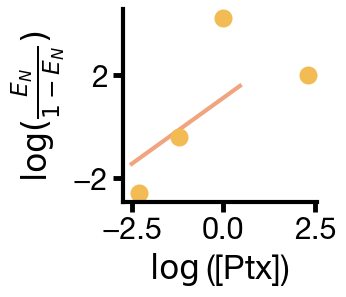

In [302]:
fig, ax = plt.subplots(1,1,figsize=(2.5,2.5))
ax.errorbar(logx , logy , yerr= 0, fmt='',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,color='#F3BB53', alpha = 1, ls='')

x0 = np.arange(-2.5, 0.5, 0.05)
ax.plot(x0, x0*m+b,color = '#E34A00', lw=3,ls= '-',alpha = 0.5)

# ax.set_ylim(-4,4)
# ax.set_xlim(-3,1)
ax.set_xlabel(r'$\log$''([Ptx])')
# ax.set_xticks(np.arange(0, 22.1, 2))
ax.set_yticks(np.arange(-2, 2.1,4))
ax.set_ylabel(r'$\log(\frac{E_N}{1-E_N})$') 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)

#ax.legend((r'$n=2.98 \pm 0.54$' '\n' r'$kd=0.020 \pm 0.017$',),loc='upper left',title='Hill Equation')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

#plt.savefig(mydir/('logexpHillfit_'+date_today+'.pdf'), bbox_inches = 'tight')

In [24]:

meanpointprops = dict(marker='D', markeredgecolor='white',
                      markerfacecolor='white')

C:\Users\sofia\AppData\Local\Temp\ipykernel_9004\3790400707.py:2: RuntimeWarning: invalid value encountered in power
  return A * np.power(x, n)/(kd + np.power(x, n))
C:\Users\sofia\AppData\Local\Temp\ipykernel_9004\3790400707.py:2: RuntimeWarning: invalid value encountered in power
  return A * np.power(x, n)/(kd + np.power(x, n))


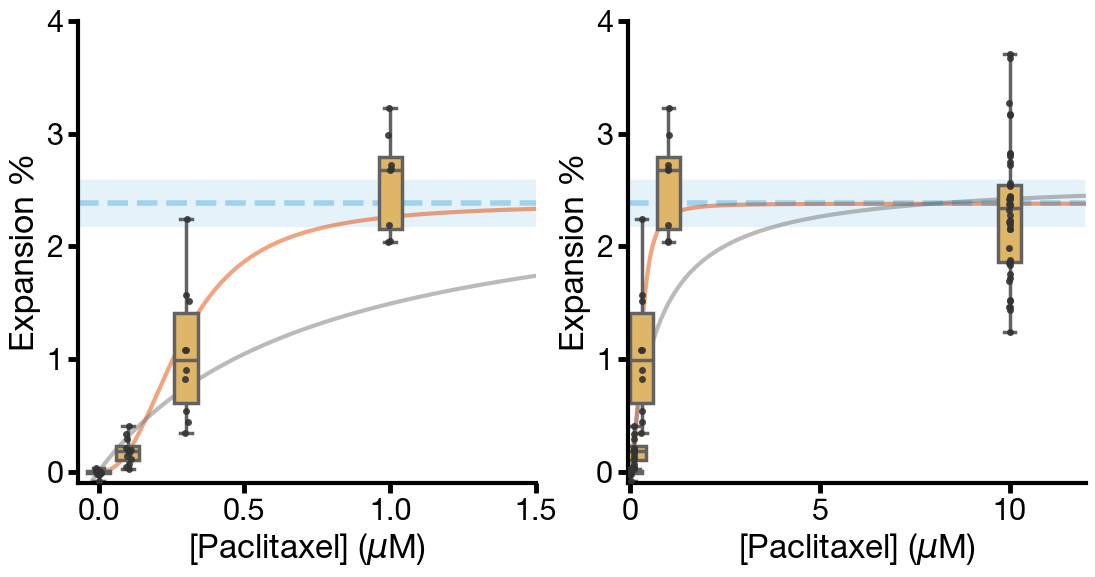

In [46]:
scattersize = 2
cap = 5

fig, ax = plt.subplots(1,2,figsize=(13,6))

x0 = np.arange(1e-8, 1.2, 0.05)


ax[0].set_yticks(np.arange(0, 4.1, 1))
ax[0].set_xticks(np.arange(0, 1.6, 0.5))
ax[0].set_ylabel('Expansion %')
ax[0].set_xlim(-0.07,1.5)
ax[0].set_ylim(-0.1,4.0)

x0 = np.arange(-0.1, 12, 0.01)

ax[1].set_yticks(np.arange(0, 4.1, 1))
ax[1].set_xticks(np.arange(0, 10.1, 5))
ax[1].set_xlim(-0.07,12)
ax[1].set_ylim(-0.1,4.0)

for i in np.arange(len(ax)):
    
    ax[i].plot(x0, hillEQ(x0, coeffPTX[0],coeffPTX[1], coeffPTX[2]),color = '#E34A00', lw=3,ls= '-',alpha = 0.5)
    ax[i].plot(x0, MMEQ(x0, coeffMM[0],coeffMM[1]),color = grey, lw=3,ls= '-',alpha = 0.5)
    ax[i].axhline(y = mean_exp, color = cyan ,linestyle="--", linewidth=4,alpha = 0.3) 
    ax[i].fill_between(x0, mean_exp - sem_exp, mean_exp + sem_exp, facecolor=cyan, alpha=0.1)
    ax[i].set_xlabel(taxol)

    #x0 = np.arange(0, 10, 0.05)
    #ax[i].plot(x0, hillEQ(x0, n, kd),color = blue, lw=3,ls= '-',alpha = 0.5)

    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_lw(3)
    ax[i].spines['bottom'].set_lw(3)

    ax[i].tick_params(axis='both', width = 3.5, length = 7)


    sns.stripplot(x=drug, y='Expansion %', data=filtdata[filtdata[drugtype]=='Paclitaxel'], color=".2", size=5, dodge=True, alpha=0.9,native_scale=True, ax=ax[i])


sns.boxplot(x= drug, y='Expansion %', data=filtdata[filtdata[drugtype]=='Paclitaxel'], whis=np.inf,linewidth=2.5,native_scale=True, ax=ax[0],color='#F3BB53')#,showmeans=True,meanprops=meanpointprops)
sns.boxplot(x= drug, y='Expansion %', data=filtdata[filtdata[drugtype]=='Paclitaxel'], whis=np.inf,width = 6,linewidth=2.5,native_scale=True, ax=ax[1],color='#F3BB53')#,showmeans=True,meanprops=meanpointprops)


#ax.legend((r'$n=2.96 \pm 1.22$' '\n' r'$kd=0.042 \pm 0.061$',),loc='lower right',title='Hill Equation')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
sns.set_style({'font.family':'Helvetica Neue LT Std', 'font.serif':'Helvetica Neue LT Std'})
plt.savefig(mydir/('Pacli-saturationBAR'+date_today+'.pdf'), bbox_inches = 'tight')

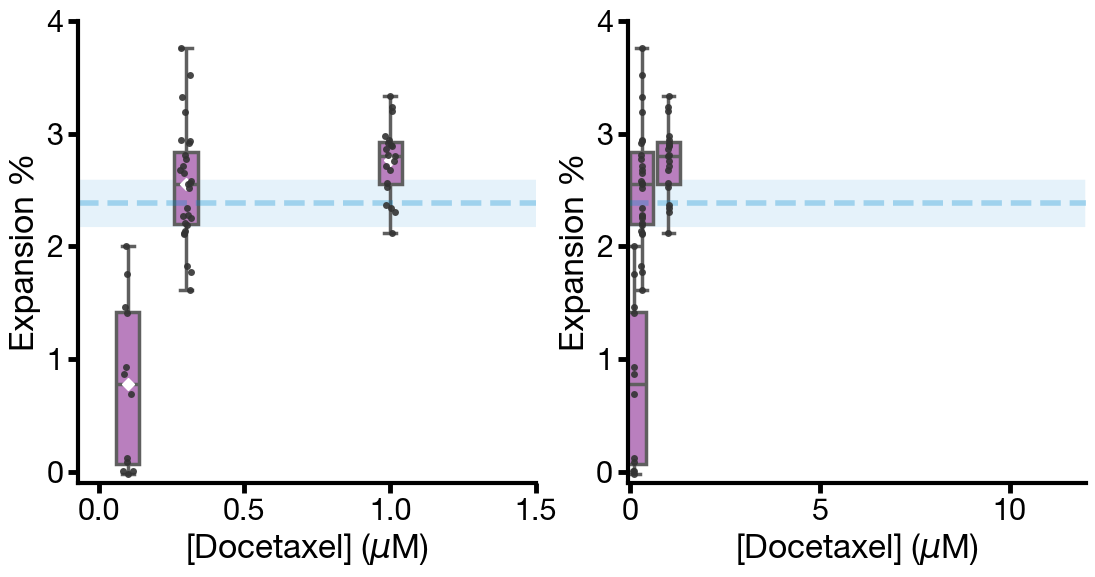

In [320]:
#'[Paclitaxel] ' r'$(\mu M)$'#'[Taxol] ' r'$(\mu M)$' #'[Docetaxol] ' r'$(\mu M)$' #'[Epothilone D] ' r'$(\mu M)$'
docedata = joindata[joindata[drugtype] == 'Docetaxel' ]

scattersize = 9
cap = 5

fig, ax = plt.subplots(1,2,figsize=(13,6))

x0 = np.arange(0, 1.2, 0.01)

ax[0].set_yticks(np.arange(0, 4.1, 1))
ax[0].set_xticks(np.arange(0, 1.6, 0.5))
ax[0].set_ylabel('Expansion %')
ax[0].set_xlim(-0.07,1.5)
ax[0].set_ylim(-0.1,4.0)

x0 = np.arange(-0.1, 12, 0.01)

ax[1].set_yticks(np.arange(0, 4.1, 1))
ax[1].set_xticks(np.arange(0, 10.1, 5))
ax[1].set_xlim(-0.07,12)
ax[1].set_ylim(-0.1,4.0)

sns.boxplot(x= drug, y='Expansion %', data=docedata,color = doce_purple, whis=np.inf,width = 0.4,linewidth=2.5,native_scale=True, ax=ax[0],showmeans=True,meanprops=meanpointprops)

sns.boxplot(x= drug, y='Expansion %', data=docedata,color = doce_purple, whis=np.inf,width = 3,linewidth=2.5,native_scale=True, ax=ax[1])


for i in np.arange(len(ax)):
        
    ax[i].set_xlabel(doce)
    sns.stripplot(x=drug, y='Expansion %', data=docedata, color=".2", size=5, dodge=True, alpha=0.9,native_scale=True, ax=ax[i])

    #x0 = np.arange(0, 10, 0.05)
    #ax[i].plot(x0, hillEQ(x0, coeffDTX[0],coeffDTX[1], coeffDTX[2]),color = doce_purple, lw=3,ls= '-',alpha = 0.5)
    ax[i].axhline(y = mean_exp, color = cyan ,linestyle="--", linewidth=4,alpha = 0.3) 
    ax[i].fill_between(x0, mean_exp - sem_exp, mean_exp + sem_exp, facecolor=cyan, alpha=0.1)

    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_lw(3)
    ax[i].spines['bottom'].set_lw(3)
    ax[i].tick_params(axis='both', width = 3.5, length = 7)

#ax.legend((r'$n=2.96 \pm 1.22$' '\n' r'$kd=0.042 \pm 0.061$',),loc='lower right',title='Hill Equation')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

#plt.savefig(mydir/('Doce-saturationBAR'+date_today+'.pdf'), bbox_inches = 'tight')

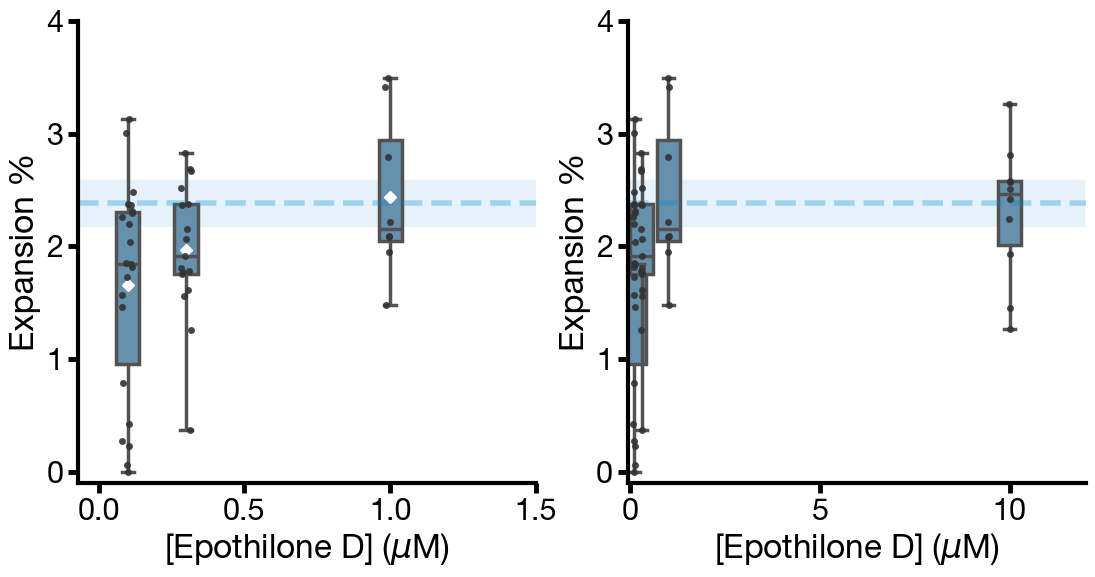

In [321]:
#'[Paclitaxel] ' r'$(\mu M)$'#'[Taxol] ' r'$(\mu M)$' #'[Docetaxol] ' r'$(\mu M)$' #'[Epothilone D] ' r'$(\mu M)$'
epodata = joindata[joindata[drugtype] == 'Epothilone D' ]

scattersize = 9
cap = 5

fig, ax = plt.subplots(1,2,figsize=(13,6))

x0 = np.arange(0, 1.2, 0.01)

ax[0].set_yticks(np.arange(0, 4.1, 1))
ax[0].set_xticks(np.arange(0, 1.6, 0.5))
ax[0].set_ylabel('Expansion %')
ax[0].set_xlim(-0.07,1.5)
ax[0].set_ylim(-0.1,4.0)


x0 = np.arange(-0.1, 12, 0.01)

ax[1].set_yticks(np.arange(0, 4.1, 1))
ax[1].set_xticks(np.arange(0, 10.1, 5))
ax[1].set_xlim(-0.07,12)
ax[1].set_ylim(-0.1,4.0)



sns.boxplot(x= drug, y='Expansion %', data=epodata,color = epo_blue, whis=np.inf,width = 0.4,linewidth=2.5,native_scale=True, ax=ax[0],showmeans=True,meanprops=meanpointprops)

sns.boxplot(x= drug, y='Expansion %', data=epodata,color = epo_blue, whis=np.inf,width = 3,linewidth=2.5,native_scale=True, ax=ax[1])


for i in np.arange(len(ax)):
        
    ax[i].set_xlabel(epod)
    sns.stripplot(x=drug, y='Expansion %', data=epodata, color=".2", size=5, dodge=True, alpha=0.9,native_scale=True, ax=ax[i])

    #ax[i].plot(x0, hillEQ(x0, coeffEpoD[0],coeffEpoD[1], coeffEpoD[2]),color = blue, lw=3,ls= '-',alpha = 0.5)
    ax[i].axhline(y = mean_exp, color = cyan ,linestyle="--", linewidth=4,alpha = 0.3) 
    ax[i].fill_between(x0, mean_exp - sem_exp, mean_exp + sem_exp, facecolor=cyan, alpha=0.1)

    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_lw(3)
    ax[i].spines['bottom'].set_lw(3)
    ax[i].tick_params(axis='both', width = 3.5, length = 7)

#ax.legend((r'$n=2.96 \pm 1.22$' '\n' r'$kd=0.042 \pm 0.061$',),loc='lower right',title='Hill Equation')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

#plt.savefig(mydir/('EpoD-saturationBAR'+date_today+'.pdf'), bbox_inches = 'tight')

In [295]:
mydir

WindowsPath('C:/Users/sofia/OneDrive - McGill University/CurrBio2023/Sofia/Data/expansion-drug')

C:\Users\sofia\anaconda3\envs\brouhardlab-env\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sofia\anaconda3\envs\brouhardlab-env\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


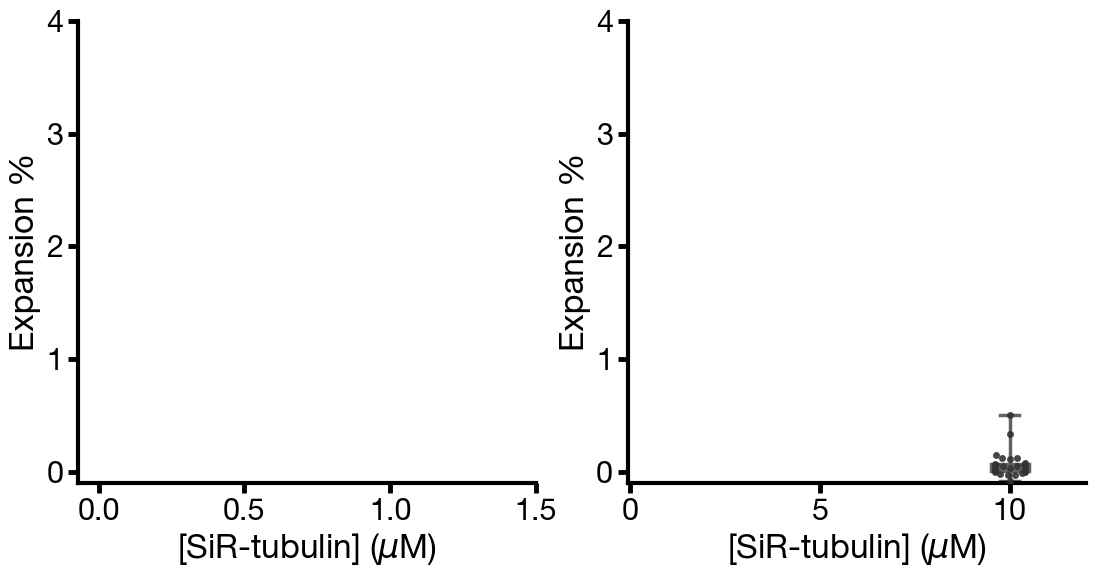

In [285]:
#'[Paclitaxel] ' r'$(\mu M)$'#'[Taxol] ' r'$(\mu M)$' #'[Docetaxol] ' r'$(\mu M)$' #'[Epothilone D] ' r'$(\mu M)$'
sirdata = joindata[joindata[drugtype] == 'SiR-tubulin' ]

scattersize = 9
cap = 5

fig, ax = plt.subplots(1,2,figsize=(13,6))

x0 = np.arange(0, 1.2, 0.05)

ax[0].set_yticks(np.arange(0, 4.1, 1))
ax[0].set_xticks(np.arange(0, 1.6, 0.5))
ax[0].set_ylabel('Expansion %')
ax[0].set_xlim(-0.07,1.5)
ax[0].set_ylim(-0.1,4.0)

x0 = np.arange(0, 12, 0.05)

ax[1].set_yticks(np.arange(0, 4.1, 1))
ax[1].set_xticks(np.arange(0, 10.1, 5))
ax[1].set_xlim(-0.07,12)
ax[1].set_ylim(-0.1,4.0)

sns.boxplot(x= drug, y='Expansion %', data=sirdata,color= sir_red, whis=np.inf,width = 0.4,linewidth=2.5,native_scale=True, ax=ax[0])

sns.boxplot(x= drug, y='Expansion %', data=sirdata,color= sir_red, whis=np.inf,width = 1,linewidth=2.5,native_scale=True, ax=ax[1])


for i in np.arange(len(ax)):
        
    ax[i].set_xlabel(sirtub)
    sns.swarmplot(x=drug, y='Expansion %', data=sirdata, color=".2", size=5, dodge=True, alpha=0.9,native_scale=True, ax=ax[i])

    #x0 = np.arange(0, 10, 0.05)
    #ax[i].plot(x0, hillEQ(x0, n, kd),color = blue, lw=3,ls= '-',alpha = 0.5)

    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_lw(3)
    ax[i].spines['bottom'].set_lw(3)
    ax[i].tick_params(axis='both', width = 3.5, length = 7)

#ax.legend((r'$n=2.96 \pm 1.22$' '\n' r'$kd=0.042 \pm 0.061$',),loc='lower right',title='Hill Equation')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

plt.savefig(mydir/('expHillfit_Sir_'+date_today+'.pdf'), bbox_inches = 'tight')

C:\Users\Brouhard Lab\AppData\Local\Temp\ipykernel_4332\3630994210.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.2'` for the same effect.

  ax = sns.swarmplot(x=drug, y='Expansion %',hue=drugtype, data=joindata, color=".2", size=8, dodge=True, alpha=0.9)
C:\Users\Brouhard Lab\anaconda3\envs\brouhardlab-env\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Brouhard Lab\anaconda3\envs\brouhardlab-env\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


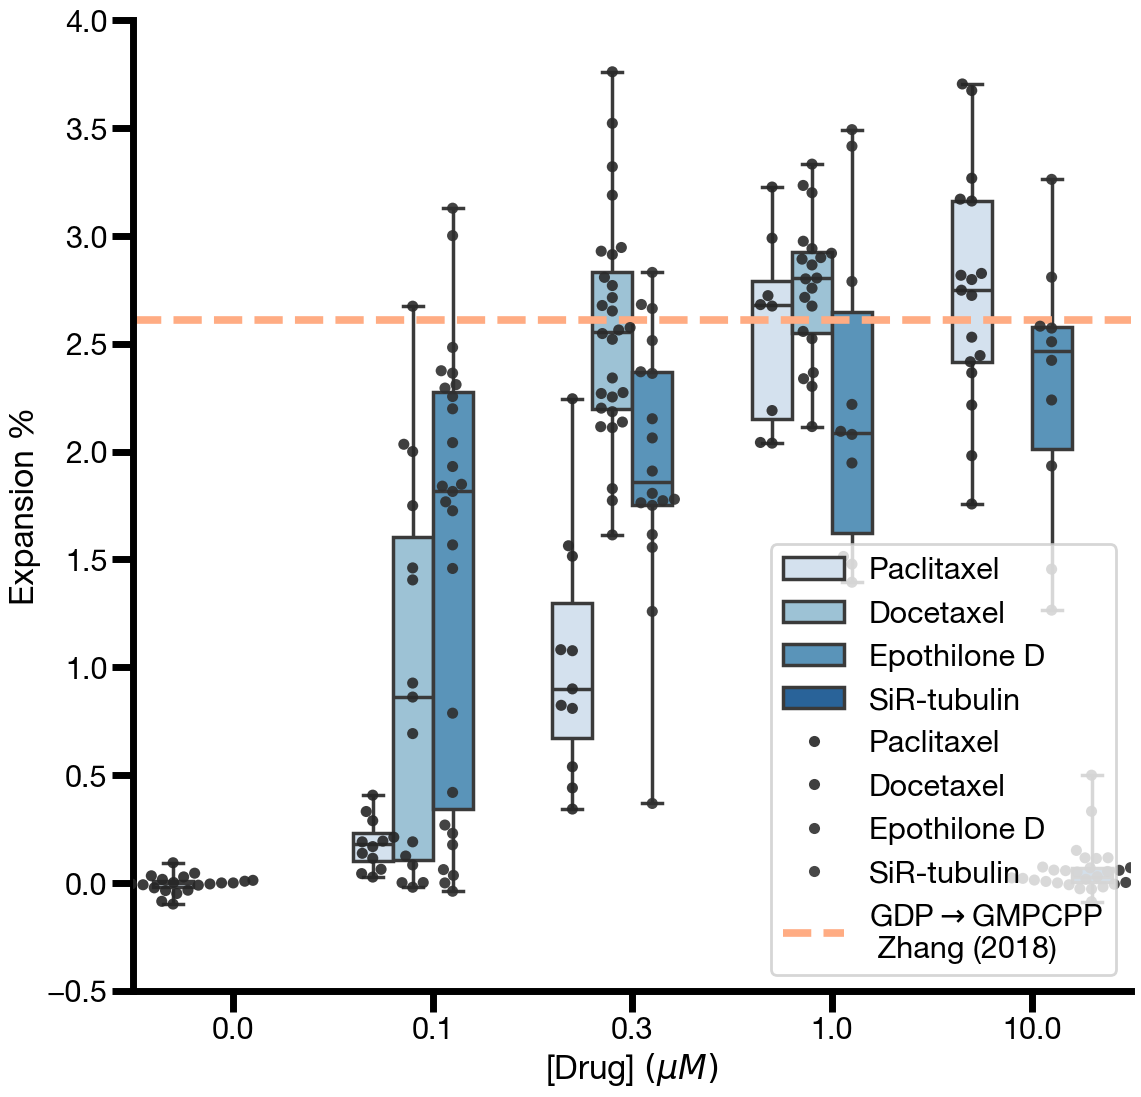

In [74]:
fig, ax = plt.subplots(1,1,figsize=(12,12))

#rect = 0,0,1,1 # create an rectangle for the new axis
#log_ax = fig.add_axes(rect) # create a new axis (or use an existing one)
#log_ax.set_xscale("log") # log first

ax = sns.boxplot(x= drug, y='Expansion %',hue=drugtype, data=joindata, whis=np.inf,linewidth=2.5, palette='Blues')
ax = sns.swarmplot(x=drug, y='Expansion %',hue=drugtype, data=joindata, color=".2", size=8, dodge=True, alpha=0.9)

ax.axhline(y = nogales2018, color = lightorange ,linestyle="--", linewidth=5.5, label='GDP'r'$\rightarrow$''GMPCPP \n Zhang (2018)')
#plt.xlim(0.1,10)

ax.set_ylim(-0.5,4)
ax.legend( loc = 'lower right')
#ax.legend('')
ax.set_xlabel(drug)

sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()


#plt.savefig(path/('mergedrugs_'+date_today+'.svg'))

In [16]:
def ttest_exp(joindata,drug1,conc1,drug2,conc2):
    expdata1 = joindata[(joindata[drugtype] == drug1) & (joindata[drug] == conc1)][['Expansion %']].values
    expdata2 = joindata[(joindata[drugtype] == drug2) & (joindata[drug] == conc2)][['Expansion %']].values
    
    return sp.stats.ttest_ind(expdata1, expdata2, axis=0, equal_var=False,alternative = "greater") #,alternative = "greater"

In [89]:
ttest_exp(joindata,'Paclitaxel',10,'Docetaxel',0.3)

TtestResult(statistic=array([-1.95531254]), pvalue=array([0.05502848]), df=array([62.3963603]))

In [17]:
ttest_exp(joindata,'SiR-tubulin',10,'Paclitaxel',0)

TtestResult(statistic=array([2.98090156]), pvalue=array([0.0023868]), df=array([41.83150572]))

In [91]:
ttest_exp(joindata,'Paclitaxel',10,'Epothilone D',1)

TtestResult(statistic=array([0.22397113]), pvalue=array([0.82672596]), df=array([11.45052154]))

In [94]:
ttest_exp(joindata,'Epothilone D',0.3,'Paclitaxel',0.3)

TtestResult(statistic=array([4.21620389]), pvalue=array([0.00017627]), df=array([22.11327188]))

In [83]:
joindata[(joindata[drugtype] == 'Paclitaxel') & (joindata[drug] == 10)][['Expansion %']].values.mean()

2.3000362801222596

## LOAD MAP7 ##

In [11]:
askfile = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the folder on ONE date you want to process
filepath = Path(askfile)
filename = filepath.stem
filepath, filename

(WindowsPath('C:/Users/sofia/OneDrive - McGill University/CurrBio2023/Sofia/Data/expansion-MAP7/jointdata-MAP7-on_2022-10-31_MasterSheet.csv'),
 'jointdata-MAP7-on_2022-10-31_MasterSheet')

In [12]:
mydir= filepath.parents[0]

In [13]:
joindata = pd.read_csv(filepath, encoding='utf-8')

In [14]:
joindata

,Curve Name,Curve Length (um),[MAP] $(n M)$,MAP Type,Date,CH
0,CURVE 1,8.826065,0,MAP7,2022-10-25,1
1,CURVE 1,8.887982,125,MAP7,2022-10-25,1
2,CURVE 2,6.994892,0,MAP7,2022-10-25,1
3,CURVE 2,6.991910,125,MAP7,2022-10-25,1
4,CURVE 3,7.389935,0,MAP7,2022-10-25,1
...,...,...,...,...,...,...
69,CURVE 5,8.814653,125,MAP7,2022-10-26,2
70,CURVE 6,9.779360,0,MAP7,2022-10-26,2
71,CURVE 6,9.774572,125,MAP7,2022-10-26,2
72,CURVE 7,8.934038,0,MAP7,2022-10-26,2


In [19]:
plainData = joindata.iloc[:-1:2]
map7Data = joindata.iloc[1::2]
percent_expansion(plainData, map7Data)
finalData = map7Data
finalData

C:\Users\sofia\AppData\Local\Temp\ipykernel_18148\4009520246.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afterData['Expansion %'] = prcnt_expansion


,Curve Name,Curve Length (um),[MAP] $(n M)$,MAP Type,Date,CH,Expansion %
1,CURVE 1,8.887982,125,MAP7,2022-10-25,1,0.696632
3,CURVE 2,6.991910,125,MAP7,2022-10-25,1,-0.042643
5,CURVE 3,7.386777,125,MAP7,2022-10-25,1,-0.042755
7,CURVE 4,6.158234,125,MAP7,2022-10-25,1,0.938534
9,CURVE 5,5.652410,125,MAP7,2022-10-25,1,0.731462
11,CURVE 6,10.479588,125,MAP7,2022-10-25,1,0.911355
13,CURVE 7,8.090412,125,MAP7,2022-10-25,1,0.526813
15,CURVE 8,5.162394,125,MAP7,2022-10-25,1,0.430062
17,CURVE 9,8.323663,125,MAP7,2022-10-25,1,0.145048
19,CURVE 1,6.699203,125,MAP7,2022-10-25,2,0.658076


In [22]:
finalData = finalData[finalData['Curve Length (um)'] > 5.5]

In [25]:
finalData.to_csv(mydir/('expansion_plain_to_MAP7_data-analyzed_'+date_today +'_MasterSheet.csv'), encoding='utf-8', index=False)

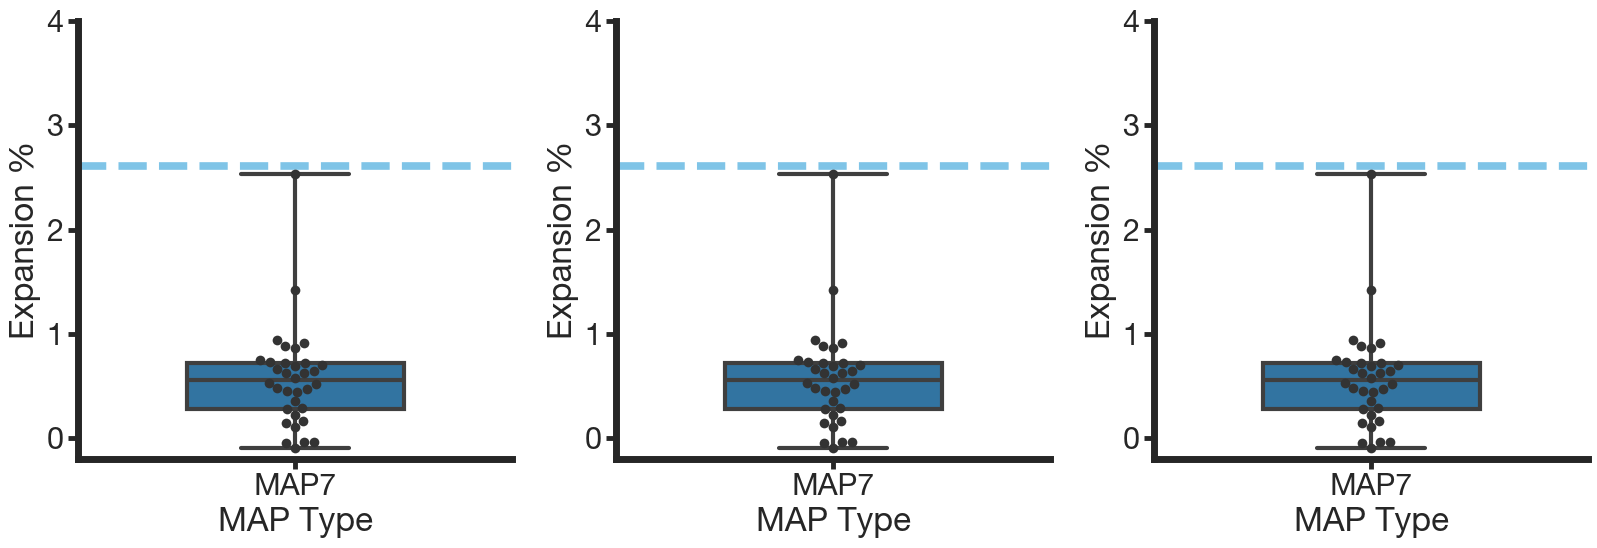

In [24]:
fig, ax = plt.subplots(1,3,figsize=(16.5,6))

for i in np.arange(len(ax)):

    sns.boxplot(x='MAP Type', y='Expansion %', data=finalData, whis=np.inf,width = 0.5,linewidth=3, ax=ax[i])
    sns.swarmplot(x='MAP Type', y='Expansion %', data=finalData, size=7, ax=ax[i], color=".2")

    ax[i].axhline(y = nogales2018, color = '#7FC4E7' ,linestyle="--", linewidth=5.5)

    ax[i].set_ylim(-0.2,4)
    ax[i].spines['left'].set_lw(5)
    ax[i].spines['bottom'].set_lw(5)
    ax[i].tick_params(axis='both', width = 3.5, length = 7)
    
    #ax[i].legend([])


sns.set_style("ticks")
sns.despine()

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

sns.set_style({'font.family':'Helvetica Neue LT Std', 'font.serif':'Helvetica Neue LT Std'})

plt.tight_layout()


plt.savefig(mydir/('expantion_MAP7_'+date_today+'.pdf'))
# plt.savefig(path/('compaction_'+date_today+'.png'))

In [22]:
def median_quantiles(joindata, drugname):
    expdata = joindata[joindata['MAP Type'] == drugname][['MAP Type','Expansion %']]
    medianexp = expdata.groupby('MAP Type').quantile([0.5])
    Q25data = expdata.groupby('MAP Type').quantile([0.25])
    Q75data = expdata.groupby('MAP Type').quantile([0.75])
    return pd.concat([medianexp.reset_index(), Q25data.reset_index(), Q75data.reset_index()], axis=1)

In [23]:
median_quantiles(finalData, 'MAP7')

,MAP Type,level_1,Expansion %,MAP Type,level_1,Expansion %,MAP Type,level_1,Expansion %
0,MAP7,0.5,0.526813,MAP7,0.25,0.281854,MAP7,0.75,0.720935


In [39]:
expdata1 = finalData[['Expansion %']].values
expdata2 = filtdata[(filtdata[drugtype] == 'Paclitaxel') & (filtdata[drug] == 0.3)][['Expansion %']].values
    
sp.stats.ttest_ind(expdata2, expdata1, axis=0, equal_var=False,alternative = "greater") #,alternative = "greater"

TtestResult(statistic=array([2.42865597]), pvalue=array([0.01550094]), df=array([12.5552429]))

In [27]:
def mean_sd_map7(joindata):
    expdata = joindata[['MAP Type','Expansion %']]
    meandata = expdata.groupby(['MAP Type']).mean()
    stddata = expdata.groupby(['MAP Type']).sem()
    ncount = expdata.groupby(['MAP Type']).count()
    x = meandata.index.values
    y = meandata['Expansion %'].values
    yerr = stddata['Expansion %'].values
    n = ncount['Expansion %'].values
    
    data = {'MAP Type' : 'MAP7',
        'Mean Expansion %': y,
         'SEM Expansion %': yerr,
            'n': n
           }
    
    df = pd.DataFrame(data)

    return df

In [28]:
mean_sd_map7(finalData)

,MAP Type,Mean Expansion %,SEM Expansion %,n
0,MAP7,0.564375,0.082686,34


In [1]:
#### LAFRANCE expansion
mean_exp = 2.38
sd_exp = 0.58
sem_exp = 0.21

In [2]:
def inner_deformation(d,w,k):
    return  ((1-w*k/2)-1)*100
def outer_deformation(d,w,k):
    return  ((1+w*k/2)-1)*100

In [3]:
d  = 8.355 /1000
w =  25/1000

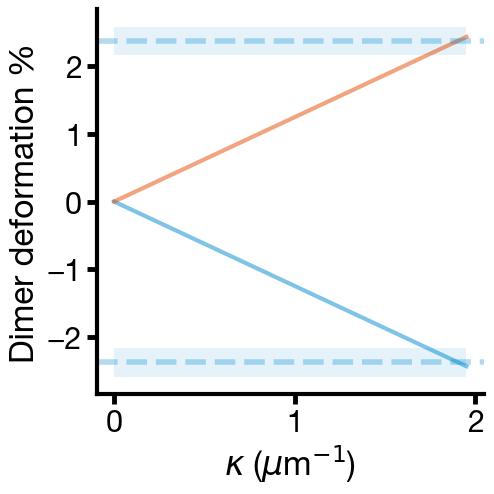

In [57]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

k = np.arange(0, 2, 0.05)
ax.plot(k, inner_deformation(d,w,k),color = cyan, lw=3,ls= '-',alpha = 0.5)
ax.plot(k, outer_deformation(d,w,k),color = '#E34A00', lw=3,ls= '-',alpha = 0.5)
ax.axhline(y = mean_exp, color = cyan ,linestyle="--", linewidth=4,alpha = 0.3) 
ax.fill_between(k, mean_exp - sem_exp, mean_exp + sem_exp, facecolor=cyan, alpha=0.1)
ax.axhline(y = -mean_exp, color = cyan ,linestyle="--", linewidth=4,alpha = 0.3) 
ax.fill_between(k, -mean_exp + sem_exp, - mean_exp - sem_exp, facecolor=cyan, alpha=0.1)

# ax.set_ylim(-4,4)
# ax.set_xlim(-3,1)
ax.set_xlabel(r'$\kappa$'' ('r'$\mu$''m'r'$^{-1}$'')')
# ax.set_xticks(np.arange(0, 22.1, 2))
# ax.set_yticks(np.arange(-2, 2.1,4))
ax.set_ylabel('Dimer deformation %') 

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)

#ax.legend((r'$n=2.98 \pm 0.54$' '\n' r'$kd=0.020 \pm 0.017$',),loc='upper left',title='Hill Equation')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

plt.savefig(mydir/('deformation_'+date_today+'.pdf'), bbox_inches = 'tight')

In [50]:
mydir

NameError: name 'mydir' is not defined

In [4]:
2.38 + inner_deformation(d,w,1)

1.1300000000000043

In [70]:
inner_deformation(d,w,1)

-1.2499999999999956